In [63]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer

import zipfile, csv, json, math
from sklearn.cluster import KMeans

%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

# Input data files are available in the "./E8B6A8E58BA2E7A791E68A80E6A99FE599A8E5ADB8E7BF92E5B08FE68C91E688B0-input" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output

# Any results you write to the current directory are saved as output.

In [6]:
with open('PBP-pycon/PBP-train.csv', 'rb') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=' ', quotechar='|')

In [10]:
train_data = pd.read_csv('PBP-pycon/PBP-train.csv', header=None)
print train_data.head(5)

   0      1      2  3  4    5      6   7   8
0  K  T0655  TDC33  0  1  NaN  15:00  35   0
1  R  T0655  TDC33  0  1  1.0  15:00  80  10
2  P  T0655  TDC33  0  1  1.0  14:21  62  10
3  R  T0655  TDC33  0  1  2.0  14:04  53   1
4  P  T0655  TDC33  0  1  1.0  13:26  49  10


In [11]:
train_data.fillna(-1, inplace=True)
Y=np.array(train_data[0])
X=np.array(train_data.ix[:, 3:5])
print(Y[:5])
print(X[:5])

['K' 'R' 'P' 'R' 'P']
[[ 0.  1. -1.]
 [ 0.  1.  1.]
 [ 0.  1.  1.]
 [ 0.  1.  2.]
 [ 0.  1.  1.]]


In [16]:
clf = LogisticRegression()
clf = clf.fit(X, Y)
print(clf.score(X,Y))

0.616222017786


In [19]:
test_data = pd.read_csv('PBP-pycon/PBP-test.csv', header=None)
print test_data.head(5)

   0      1      2   3  4    5      6   7   8
0  -  T5E76  T6049   8  4  1.0   0:21  15  10
1  -  T7A23  TCD89   7  4  NaN   2:01  35   0
2  -  T2523  T94A9   0  1  4.0  12:02  81  11
3  -  T79CB  TCE31  -6  4  3.0   0:15  39   3
4  -  TDC33  T0655  11  3  1.0  11:17   1   1


In [20]:
test_data.fillna(-1, inplace=True)
X=np.array(test_data.ix[:, 3:5])
print(X)

[[  8.   4.   1.]
 [  7.   4.  -1.]
 [  0.   1.   4.]
 [ -6.   4.   3.]
 [ 11.   3.   1.]
 [  7.   2.   4.]
 [ -4.   2.   3.]
 [  0.   3.   2.]
 [ -2.   3.   3.]
 [  0.   1.   3.]]


In [21]:
for i, p in enumerate(clf.predict(X)):
    print(i, p)

(0, 'P')
(1, 'K')
(2, 'PP')
(3, 'P')
(4, 'R')
(5, 'PP')
(6, 'P')
(7, 'P')
(8, 'P')
(9, 'P')


In [34]:
zf = zipfile.ZipFile('TrendMicro-malware-dataset-pycon.zip', 'r')
for f in zf.namelist()[:4]:
    print(f)

TrendMicro-malware-dataset/00034ba766f8721f43999bbfa341969fac85fdfe/
TrendMicro-malware-dataset/00034ba766f8721f43999bbfa341969fac85fdfe/sections
TrendMicro-malware-dataset/00034ba766f8721f43999bbfa341969fac85fdfe/info
TrendMicro-malware-dataset/00034ba766f8721f43999bbfa341969fac85fdfe/import


In [35]:
for f in zf.namelist()[:4]:
    print(f)
    data = zf.read(f).decode("utf8")
    print(data)
    print()

TrendMicro-malware-dataset/00034ba766f8721f43999bbfa341969fac85fdfe/

()
TrendMicro-malware-dataset/00034ba766f8721f43999bbfa341969fac85fdfe/sections
[{"Index": 0, "Name": ".text\u0000\u0000\u0000", "Entropy": 6.6889715264505378, "VirtualSize": 143009, "Flags": "R-X CODE", "RawSize": 143360, "VirtualAddress": "0x1000"}, {"Index": 1, "Name": ".rdata\u0000\u0000", "Entropy": 4.5827597405217659, "VirtualSize": 38886, "Flags": "R-- IDATA", "RawSize": 38912, "VirtualAddress": "0x24000"}, {"Index": 2, "Name": ".data\u0000\u0000\u0000", "Entropy": 7.9721441134776718, "VirtualSize": 466408, "Flags": "RW- IDATA", "RawSize": 425472, "VirtualAddress": "0x2e000"}, {"Index": 3, "Name": ".rsrc\u0000\u0000\u0000", "Entropy": 4.0908414054759792, "VirtualSize": 19064, "Flags": "R-- IDATA", "RawSize": 19456, "VirtualAddress": "0xa0000"}, {"Index": 4, "Name": ".reloc\u0000\u0000", "Entropy": 6.4183542620674388, "VirtualSize": 7296, "Flags": "R-- IDATA", "RawSize": 7680, "VirtualAddress": "0xa5000"}]
()
T

In [49]:
feats=[]
lbs=[]
for f in zf.namelist():
    if 'info' not in f: continue
    data = zf.read(f)
    j = json.loads(data.decode("utf-8"))
    
    try: 
        feats.append((float(j['FileEntropy']), \
                      math.log(float(j['FileSize'])), \
                      math.log(float(j['SizeOfImage'])), \
                      math.log(float(j['SizeOfCode']))))
    except: 
        continue
    lbs.append(f.split('/')[1])
print(feats[:3])
print(lbs[:3])

[(7.68052371269871, 13.373539129403458, 13.4357599791361, 11.873114228208758), (7.876824723013971, 11.058606190644545, 11.955352326445729, 9.534161491043838), (6.231757935069372, 13.521774195227245, 13.52177285379614, 13.285841846396803)]
['00034ba766f8721f43999bbfa341969fac85fdfe', '00036d496f906107c2943b2f38fa9a65888c0e5f', '00141e38f00072e8854a8aeec7028456e54eb341']


In [53]:
km = KMeans(n_clusters=3).fit(feats)
for i in range(10): print(km.labels_[i], lbs[i], feats[i])

(1, '00034ba766f8721f43999bbfa341969fac85fdfe', (7.68052371269871, 13.373539129403458, 13.4357599791361, 11.873114228208758))
(0, '00036d496f906107c2943b2f38fa9a65888c0e5f', (7.876824723013971, 11.058606190644545, 11.955352326445729, 9.534161491043838))
(1, '00141e38f00072e8854a8aeec7028456e54eb341', (6.231757935069372, 13.521774195227245, 13.52177285379614, 13.285841846396803))
(1, '0019d715f0f3ab076ba01946ab33b510d697a204', (7.584560175787936, 13.474236410601565, 13.527252319560764, 11.88023169597762))
(1, '001bebfb7878aa60c9c261827b0fcfb1ef5d9350', (7.717577042468502, 13.439064300524795, 13.52177285379614, 11.88023169597762))
(1, '001c5920be0447c52c77b5673121f91167dae3e0', (6.617887953319812, 13.42143632678279, 13.499549717011428, 13.282357522314193))
(1, '00223d97e49c15dfe6d2bb41bc49cc27eae0e9da', (6.393731345235996, 13.046691105448327, 13.0799401015171, 12.56268358742082))
(0, '0025b66c923168bf934d6ea74f64cd68511cfc18', (7.756242400554864, 12.18887053395999, 12.828625673236195, 10

In [55]:
target_data=['A. 00034ba766f8721f43999bbfa341969fac85fdfe',
    'B. 0025b66c923168bf934d6ea74f64cd68511cfc18',
    'C. 004950b412188d2e53d2b3b5ae965faf6e9f45ee',
    'D. 00d71709950d1a97c1faa8dee2e5d98bde4db3ec',
    'E. 02985f4076d6e4b4b4fdf0141c7171e887377f1b',
    'F. 02e81a7cb55a956ef6b1499d4d3d56d4fbd2e818',
    'G. 03214459440feff531bd3187ca981a104de9c137'
]
group_dict={}
for f in target_data:
    i=lbs.index(f.split()[1])
    print(lbs[i], km.labels_[i])
    group_dict[km.labels_[i]]=f

('00034ba766f8721f43999bbfa341969fac85fdfe', 1)
('0025b66c923168bf934d6ea74f64cd68511cfc18', 0)
('004950b412188d2e53d2b3b5ae965faf6e9f45ee', 0)
('00d71709950d1a97c1faa8dee2e5d98bde4db3ec', 1)
('02985f4076d6e4b4b4fdf0141c7171e887377f1b', 1)
('02e81a7cb55a956ef6b1499d4d3d56d4fbd2e818', 2)
('03214459440feff531bd3187ca981a104de9c137', 0)


In [57]:
test_data=['1. 00724a6fa856016f98006346f65edf308753e341',
    '2. 0076ad9b2c2c30912a1a045b9233c3fd1c113dcb',
    '3. 007e9931c4662b6a772f14ebb2bb9235d6145f8a',
    '4. 00989035116f2d6beedee8e0a7e9192cfbbd4cb8',
    '5. 00ac1a2eb8cfee4e3d36190309768154bba0c922',
    '6. 00adec6a2cae04d4775cdf43d46652f123b9b502',
    '7. 00ce2ff9017c270a6bca471f34ebcba12c9eab36',
    '8. 00df5b9333954b4f4beaa8be4dc7374c0af4caf2',
    '9. 00e2453df8783bf0fe5c3df9dc51f66762e7d506',
    '10. 00f1976d108daf1400bc103474adf7cf1ee80fba',
    '11. 00fa0d47c35ae7baa5510cd4786d94d30ff4f6fa',
    '12. 02f53dccaa67d3e5144a6af659840a15b61e3e1b'
]
for f in test_data:
    i=lbs.index(f.split()[1])
    l=km.labels_[i]
    print(l, group_dict[l], f)

(1, 'E. 02985f4076d6e4b4b4fdf0141c7171e887377f1b', '1. 00724a6fa856016f98006346f65edf308753e341')
(1, 'E. 02985f4076d6e4b4b4fdf0141c7171e887377f1b', '2. 0076ad9b2c2c30912a1a045b9233c3fd1c113dcb')
(1, 'E. 02985f4076d6e4b4b4fdf0141c7171e887377f1b', '3. 007e9931c4662b6a772f14ebb2bb9235d6145f8a')
(1, 'E. 02985f4076d6e4b4b4fdf0141c7171e887377f1b', '4. 00989035116f2d6beedee8e0a7e9192cfbbd4cb8')
(2, 'F. 02e81a7cb55a956ef6b1499d4d3d56d4fbd2e818', '5. 00ac1a2eb8cfee4e3d36190309768154bba0c922')
(1, 'E. 02985f4076d6e4b4b4fdf0141c7171e887377f1b', '6. 00adec6a2cae04d4775cdf43d46652f123b9b502')
(0, 'G. 03214459440feff531bd3187ca981a104de9c137', '7. 00ce2ff9017c270a6bca471f34ebcba12c9eab36')
(1, 'E. 02985f4076d6e4b4b4fdf0141c7171e887377f1b', '8. 00df5b9333954b4f4beaa8be4dc7374c0af4caf2')
(0, 'G. 03214459440feff531bd3187ca981a104de9c137', '9. 00e2453df8783bf0fe5c3df9dc51f66762e7d506')
(1, 'E. 02985f4076d6e4b4b4fdf0141c7171e887377f1b', '10. 00f1976d108daf1400bc103474adf7cf1ee80fba')
(1, 'E. 02985f4076d

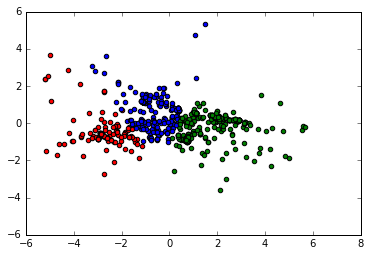

In [58]:
COLORS=['r','g','b']
from sklearn import decomposition
pca = decomposition.PCA(n_components=2)
pca = pca.fit(feats)
X = pca.transform(feats)
#plt.scatter(X[:,0], X[:,1])
for i in range(len(km.labels_)): 
    plt.scatter(X[i,0], X[i,1], c=COLORS[km.labels_[i]])


In [62]:
X

array([[ 0.68388151, -0.89500803],
       [-2.8653054 , -0.58137129],
       [ 1.99202855,  0.63802218],
       ..., 
       [-4.25029039,  2.83746211],
       [ 0.68387936, -0.89502908],
       [-1.18933029,  1.17653269]])

In [64]:
zf = zipfile.ZipFile('TrendMicro-BEC-dataset-pycon.zip', 'r')
print(zf.namelist())

['test.csv', 'train.csv']


In [65]:
train_data=pd.read_csv(zf.open('train.csv'))
print(train_data.head(5))

   Unnamed: 0                                            content  uid
0           0  \r\nJeff, I understand you've been getting pri...    0
1           1  \r\nSorry for the delay in getting back to you...    0
2           2  \r\ndon't forget to call mcmahon and give him ...    0
3           3  \r\nHear Ye, Hear Ye,\nCongratulations, Carole...    0
4           4  \r\nCome on.  You should come to the tuesday t...    0


In [66]:
Y=list(train_data.ix[:, 2])
content = list(train_data.ix[:, 1])
print(Y[:3])
print(content[:3])

[0, 0, 0]
["\r\nJeff, I understand you've been getting pricing from our crude/diesel traders \nfor some of your transportation work.  Please do not go directly to the \ntraders, rather the structuring desk.  Also, please coordinate your activites \nwith Dan Reck who is running Enron Freight, dealing with all trucking and \nrail issues.  We are acquiring a company that has relationships with many of \nthe customers you've pitched.  In most cases, we have been covering many of \nthese customers from the energy side already.\n\nThanks for your cooperation\n\nJeff", '\r\nSorry for the delay in getting back to you about my friend saar at goldman \nsachs.  he recently moved departments, and I will get you relevant data \nshortly.  \n\nregards.\n Jeff', "\r\ndon't forget to call mcmahon and give him a little grief.  Ray told me this \nwas all Jeff M.'s doing."]


In [69]:
tfidf_vectorizer = CountVectorizer()
tfidf = tfidf_vectorizer.fit_transform(content)
print(type(tfidf))

<class 'scipy.sparse.csr.csr_matrix'>


In [72]:
clf = LogisticRegression()
clf = clf.fit(tfidf, Y)
print(clf.score(tfidf,Y))

0.99625


In [73]:
test_data=pd.read_csv(zf.open('test.csv'))
print(test_data)

       sender                                            content
0  anonymous1  \r\nGuys, we are working to put together the f...
1  anonymous2  \r\nI always have time for lunch!  I will ask ...
2  anonymous3  \r\nBrent & Peggy,\n\nMemo complete with excep...
3  anonymous4  \r\nEric, we need more than $2M saving to get ...
4  anonymous5        \r\nThis is great Rob!\n\nRegards\nDelainey
5  anonymous6  \r\nLC wrap\n\nI need this for Tuesday/Wednesd...
6  anonymous7  \r\nHi Thor, \n\nSorry you won't make our offs...
7  anonymous8  \r\nWe recognize that we are experiencing a di...


In [74]:
content=list(test_data.ix[:, 1])
tfidf = tfidf_vectorizer.transform(content)
for i, p in enumerate(clf.predict(tfidf)):
    print(test_data.iloc[i,0], p)

('anonymous1', 1)
('anonymous2', 2)
('anonymous3', 2)
('anonymous4', 1)
('anonymous5', 1)
('anonymous6', 0)
('anonymous7', 0)
('anonymous8', 3)
